In [65]:
import os

import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [66]:
f = open(".\data\measurements.json")
data_json = json.loads(f.read())["Measurements"]

vs = data_json.values()

df = pd.json_normalize(vs)

df.head()

,Variety,RGB_Image,Depth_Information,FreshWeightShoot,DryWeightShoot,Height,Diameter,LeafArea
0,Lugano,RGB_27.png,Depth_27.png,5.5,0.42,9.0,11.0,153.9
1,Lugano,RGB_79.png,Depth_79.png,30.3,1.92,8.8,20.2,582.3
2,Lugano,RGB_140.png,Depth_140.png,60.9,2.83,11.6,19.0,960.6
3,Lugano,RGB_203.png,Depth_203.png,112.0,5.76,11.0,22.0,1614.9
4,Lugano,RGB_292.png,Depth_292.png,372.6,14.17,17.0,32.0,3839.6


In [67]:
df = df.loc[(df["Variety"] == "Lugano")]

df["ID"] = df["RGB_Image"].str.strip(".png").str.strip("RGB_")


In [68]:
# save lugano images to folder for visual inspection

font                   = cv2.FONT_HERSHEY_SIMPLEX
bottomLeftCornerOfText = (10,500)
fontScale              = 1
fontColor              = (255,255,255)
thickness              = 1
lineType               = 2



path = './data/RGBImages'
for item in os.listdir(path):
    if item in df["RGB_Image"].values :

        img = cv2.imread(f"{path}/{item}")
        cv2.putText(img,f'',
                    bottomLeftCornerOfText,
                    font,
                    fontScale,
                    fontColor,
                    thickness,
                    lineType)
        cv2.imwrite(f'./data/lugano/{item}', img)


In [69]:
df.sort_index(inplace=True)
df

,Variety,RGB_Image,Depth_Information,FreshWeightShoot,DryWeightShoot,Height,Diameter,LeafArea,ID
0,Lugano,RGB_27.png,Depth_27.png,5.5,0.42,9.0,11.0,153.9,27
1,Lugano,RGB_79.png,Depth_79.png,30.3,1.92,8.8,20.2,582.3,79
2,Lugano,RGB_140.png,Depth_140.png,60.9,2.83,11.6,19.0,960.6,140
3,Lugano,RGB_203.png,Depth_203.png,112.0,5.76,11.0,22.0,1614.9,203
4,Lugano,RGB_292.png,Depth_292.png,372.6,14.17,17.0,32.0,3839.6,292
...,...,...,...,...,...,...,...,...,...
357,Lugano,RGB_244.png,Depth_244.png,193.1,9.31,16.4,24.0,2715.4,244
358,Lugano,RGB_247.png,Depth_247.png,125.8,7.17,13.5,20.0,1957.0,247
359,Lugano,RGB_249.png,Depth_249.png,173.6,7.54,14.8,23.1,3278.3,249
360,Lugano,RGB_290.png,Depth_290.png,282.8,10.67,16.0,27.0,2741.1,290


In [70]:
df.sort_values(by="ID", ascending=False, inplace=True)



In [71]:
df[["Height","FreshWeightShoot", "DryWeightShoot","Diameter","LeafArea"]].max()



Height                20.00
FreshWeightShoot     395.90
DryWeightShoot        15.96
Diameter              32.00
LeafArea            5069.10
dtype: float64

In [72]:
df[["Height","FreshWeightShoot", "DryWeightShoot","Diameter","LeafArea"]].min()

Height               4.3
FreshWeightShoot     2.3
DryWeightShoot       0.1
Diameter             9.8
LeafArea            72.2
dtype: float64

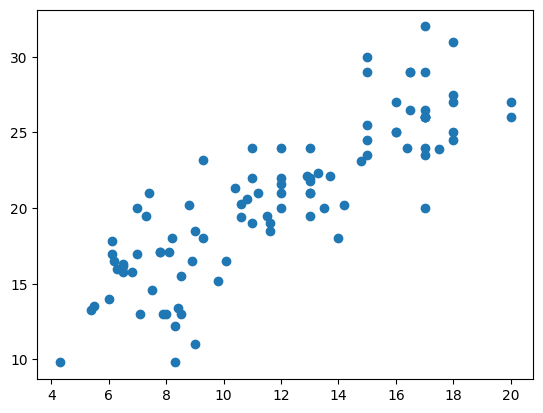

In [73]:
plt.scatter(df["Height"], df["Diameter"])

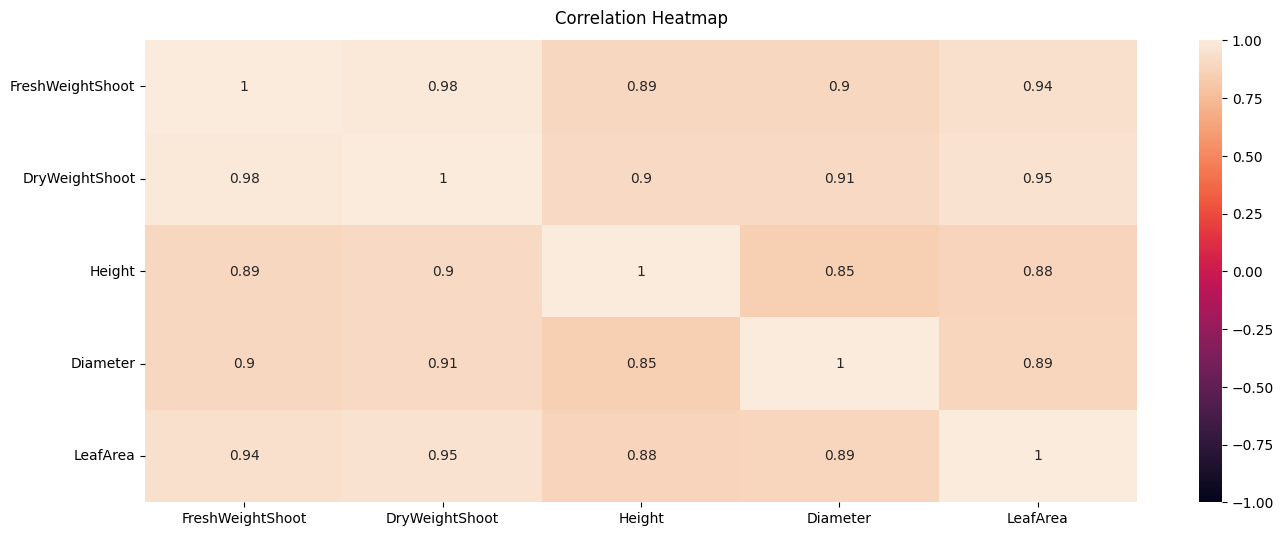

In [74]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [75]:
df.shape

(96, 9)